In [1]:
import os
import pandas as pd
import xlsxwriter
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
Good=pd.read_excel('/home/desktop-sk-05/Desktop/goodbacktest_2017.xls',sheet_name=0,header=0)

In [11]:
Poor=pd.read_excel('/home/desktop-sk-05/Desktop/poorbacktest_2017.xls',sheet_name=0,header=0)

In [12]:
Poor_Spent=Poor[Poor['Quantity']>0]

In [19]:
Poor_Spent.head()

,Time,Symbol,Price,Quantity,Type,Status,Value,Tag
0,2017-01-04 14:40:00,FPP,0.0,7142,Limit,Canceled,0.0,
1,2017-01-04 14:40:00,AIII,0.0,5000,Limit,Canceled,0.0,
2,2017-01-04 14:40:00,SPEX,0.0,5000,Limit,Canceled,0.0,
3,2017-01-04 14:40:00,RIBT,0.0,5000,Limit,Canceled,0.0,
4,2017-01-04 14:40:00,VTNR,0.0,3846,Limit,Canceled,0.0,


In [20]:
Poor_Spent.dtypes

Time        datetime64[ns]
Symbol              object
Price              float64
Quantity             int64
Type                object
Status              object
Value              float64
Tag                 object
dtype: object

In [21]:
Poor_Spent.set_index('Time',inplace=True)

In [26]:
P=Poor_Spent.resample('M').sum()

In [31]:
Ps=P.drop(['Price'],axis=1)

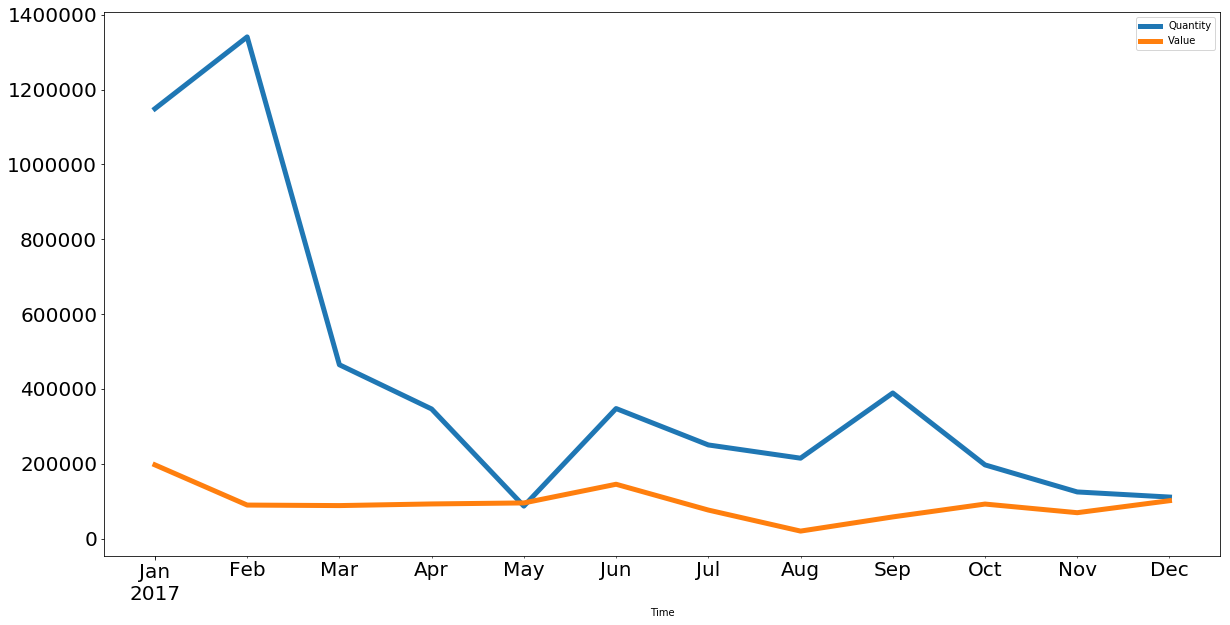

In [32]:
Ps.plot(figsize=(20,10),linewidth=5,fontsize=20)
#After February it is not seen that the units were not filled above 400000,but the value spent is in below 200000.

In [33]:
Good_Sold=Good[Good['Quantity']<0]

In [34]:
Good_Sold.dtypes

Time         object
Symbol       object
Price       float64
Quantity      int64
Type         object
Status       object
Value       float64
Tag          object
dtype: object

In [35]:
Good_Sold.Time=pd.to_datetime(Good_Sold.Time)

In [36]:
Good_Sold.set_index('Time',inplace=True)

In [41]:
Good_Sold.Quantity=abs(Good_Sold.Quantity)
Good_Sold.Value=abs(Good_Sold.Value)

In [42]:
Good_Sold.head()

,Symbol,Price,Quantity,Type,Status,Value,Tag
Time,,,,,,,
2017-01-04 16:25:00,FPP,0.75,7142,Limit,Filled,5356.5,
2017-01-04 16:25:00,SPEX,1.05,5000,Limit,Filled,5250.0,
2017-01-04 16:25:00,VTNR,1.35,3846,Limit,Filled,5192.1,
2017-01-04 16:25:00,XTNT,6.60,769,Limit,Filled,5075.4,
2017-01-04 16:25:00,IFMI,11.50,440,Limit,Filled,5060.0,


In [43]:
G=Good_Sold.resample('M').sum()

In [45]:
Gs=G.drop(['Price'],axis=1)

In [46]:
Gs

,Quantity,Value
Time,,
2017-01-31,359989,7.846545e+05
2017-02-28,270258,7.203053e+05
2017-03-31,228398,2.966468e+05
2017-04-30,145459,2.903152e+05
2017-05-31,86343,5.934039e+05
2017-06-30,131171,7.158359e+05
2017-07-31,131054,6.662789e+05
2017-08-31,161455,8.369872e+05
2017-09-30,176472,4.866638e+05


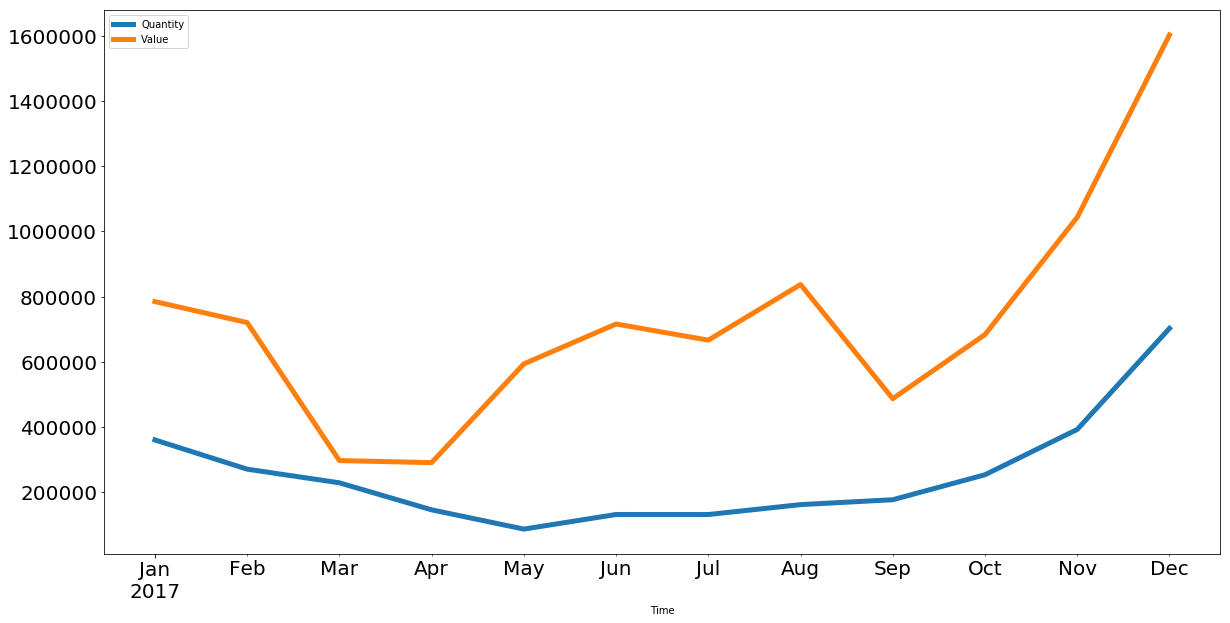

In [47]:
Gs.plot(figsize=(20,10),linewidth=5,fontsize=20)
#Though value generated is low at March and April,it recovers from may and reached a peak at December in good back test file.

In [48]:
Poor_Sold=Poor[Poor['Quantity']<0]

In [51]:
Poor_Sold.Time=pd.to_datetime(Poor_Sold.Time)
Poor_Sold.set_index('Time',inplace=True)

In [52]:
Poor_Sold.Quantity=abs(Poor_Sold.Quantity)
Poor_Sold.Value=abs(Poor_Sold.Value)

In [53]:
P=Poor_Sold.resample('M').sum()
Ps=P.drop(['Price'],axis=1)
Ps

,Quantity,Value
Time,,
2017-01-31,102651,178301.515780
2017-02-28,70976,86421.790600
2017-03-31,73155,98670.850900
2017-04-30,51611,88388.027500
2017-05-31,15922,99520.918094
2017-06-30,27161,148308.935000
2017-07-31,24575,70334.370179
2017-08-31,9915,20253.910000
2017-09-30,31459,52889.250000


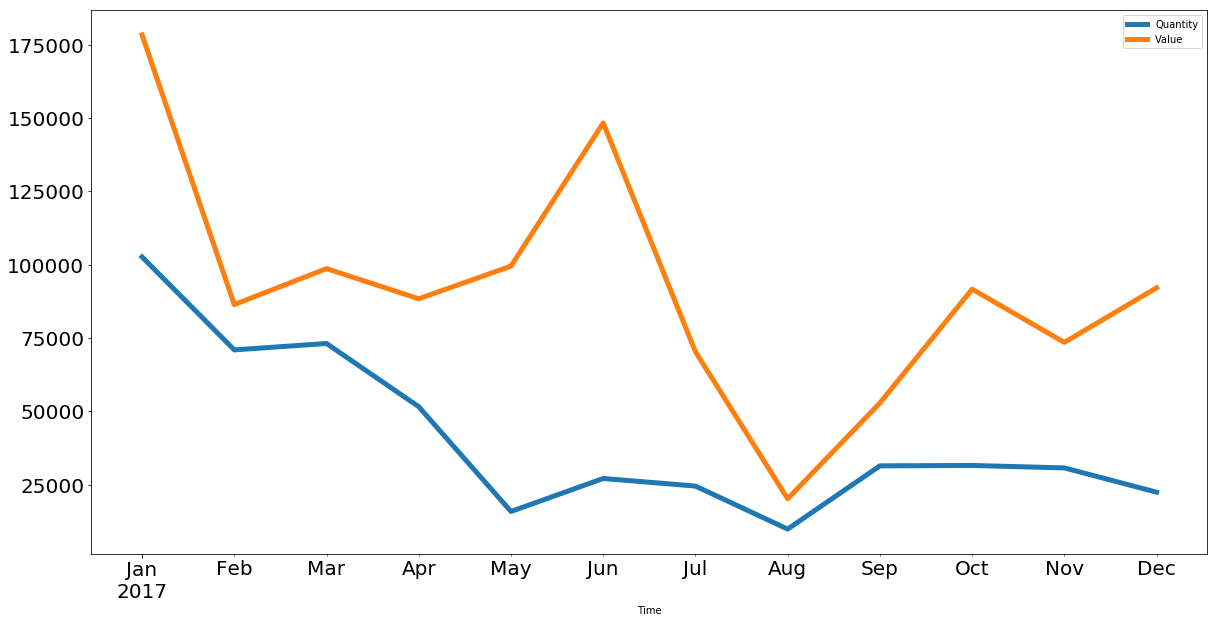

In [54]:
Ps.plot(figsize=(20,10),linewidth=5,fontsize=20)
#Quantity sold and value generated is very low in poor back test file.

In [104]:
GF=Good_Sold.reset_index()

In [110]:
import datetime

In [112]:
GF['Month']=GF['Time'].dt.month_name()

In [126]:
SF=GF.groupby(['Month','Symbol'])['Value'].sum().sort_values(ascending=False)

In [129]:
ST=SF.to_frame()

In [131]:
SL=ST.reset_index()

In [133]:
SP=SL.sort_values(['Month','Symbol'],ascending=[True,False])

In [135]:
SQ=SP.groupby('Month').head(5)

In [148]:
T=SQ.reset_index()

In [147]:
Top_5value_per_month=T.drop(['index'],axis=1)

In [149]:
Top_5value_per_month

,Month,Symbol,Value
0,April,ZSAN,51787.000000
1,April,YECO,34117.350700
2,April,RMGN,25233.050000
3,April,RKDA,13175.800000
4,April,IFMI,13272.400000
5,August,STRM,61423.950000
6,August,IFON,259306.550000
7,August,IFMI,261359.600000
8,August,FAC,6780.000000
9,August,CBIO,248117.050000
